In [1]:
# Write 3 observable trends in markdown

In [159]:
# Import modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
# Read csv files and create data frame
city_data = os.path.join("Resources","city_data.csv")
ride_data = os.path.join("Resources", "ride_data.csv")


city_data_df = pd.read_csv(city_data)
city_data_df = city_data_df.drop_duplicates(["city"])
city_data_df.head()



,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [161]:
#---TO REMOVE (testing only)
#city_row_count = city_data_df["city"].count
#print(city_row_count)

In [162]:
# Fror reference only
ride_data_df = pd.read_csv(ride_data)
ride_data_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [163]:
city_ride_df = pd.merge(ride_data_df, city_data_df, on = "city", how="outer")
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [164]:
# get unique cities and driver counts
city_data_unique = city_ride_df.loc[:, ["city", "driver_count", "type"]]
city_data_unique = city_data_unique.drop_duplicates(["city"])

city_data_unique.head()


,city,driver_count,type
0,Sarabury,46,Urban
27,South Roy,35,Urban
49,Wiseborough,55,Urban
68,Spencertown,68,Urban
94,Nguyenbury,8,Urban


In [165]:
# create df for number of of rides per city
num_rides = city_ride_df.groupby(["city"])["ride_id"].count()
num_rides_df = pd.DataFrame({"num_rides": num_rides})
num_rides_df = num_rides_df.reset_index()
#num_rides_df.head()

In [166]:
#---TO REMOVE (testing only)
# testing to to see num rides of max
#max_city = num_rides_df[num_rides_df["num_rides"] == num_rides_df["num_rides"].max()]
#print(max_city)

In [167]:
# cerate df for mean fares after grouping df by city

mean_fare = city_ride_df.groupby(["city"])["fare"].mean()

mean_fare_df = pd.DataFrame({"mean_fare": mean_fare})
mean_fare_df = mean_fare_df.reset_index()
mean_fare_df.head()

,city,mean_fare
0,Alvarezhaven,23.928710
1,Alyssaberg,20.609615
2,Anitamouth,37.315556
3,Antoniomouth,23.625000
4,Aprilchester,21.981579


In [168]:
# merge the df's together
merged_df = pd.merge(city_data_unique, mean_fare_df, on= "city", how="outer")
merged_df = pd.merge(merged_df, num_rides_df, on= "city", how="outer")
merged_df.head()

,city,driver_count,type,mean_fare,num_rides
0,Sarabury,46,Urban,23.490000,27
1,South Roy,35,Urban,26.031364,22
2,Wiseborough,55,Urban,22.676842,19
3,Spencertown,68,Urban,23.681154,26
4,Nguyenbury,8,Urban,25.899615,26


In [169]:
#---TO REMOVE (testing only)
#max_city = merged_df[merged_df["num_rides"] == merged_df["num_rides"].max()]
#print(max_city)

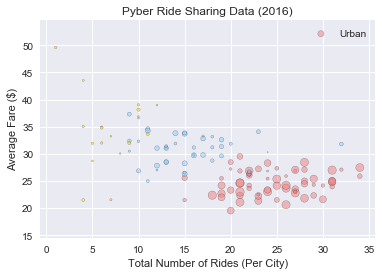

In [170]:
# Create bubble plot
    
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

#plt.xlim(0, len(merged_df["num_rides"]))
plt.ylim(min(merged_df["mean_fare"])-5, max(merged_df["mean_fare"]) + 5)

#Set colors
col_map = merged_df["type"].map({"Urban": "lightcoral", "Suburban": "lightskyblue", "Rural": "gold"})


plt.scatter(merged_df["num_rides"], merged_df["mean_fare"], c= col_map, s=merged_df["driver_count"], alpha = .5, edgecolor = "black")
plt.legend(["Urban", "Suburban", "Rural"], loc = "upper right")

#sns.lmplot(x="num_rides", y="mean_fare", data=merged_df, fit_reg=False, # No regression line, line_kws = col_map, hue="type")

sns.set()
plt.show()

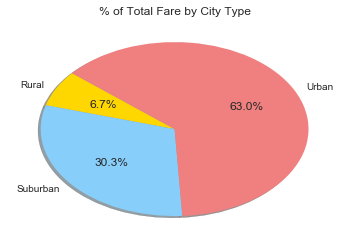

In [214]:
### Pie Chart - % of Total Fares by City Type
total_fares = city_ride_df["fare"].sum()
#print(total_fares)

total_fares_type = city_ride_df.groupby(["type"]).sum()
#total_fares_type

total_fares_type["pct_total_fare"] = (total_fares_type["fare"]/total_fares) * 100

total_fares_type

# create pie chart
colors = ["gold", "lightskyblue", "lightcoral"]
city_type = ["Rural", "Suburban", "Urban"]
explode = [.1,0,0]

plt.pie(total_fares_type["pct_total_fare"], labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

#print(total_fares_type)
plt.title("% of Total Fare by City Type")
plt.show()


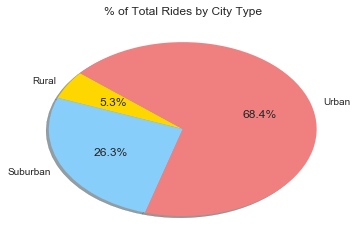

In [204]:
### Pie Chart - % Total Rides by City Type
total_rides = city_ride_df["fare"].count()

total_rides_type = city_ride_df.groupby(["type"]).count()

total_rides_type["pct_total_rides"] = (total_rides_type["fare"]/total_rides) * 100

#total_rides_type

# create pie chart
colors = ["gold", "lightskyblue", "lightcoral"]
city_type = ["Rural", "Suburban", "Urban"]
plt.pie(total_rides_type["pct_total_rides"], labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

#print(total_fares_type)
plt.title("% of Total Rides by City Type")
plt.show()


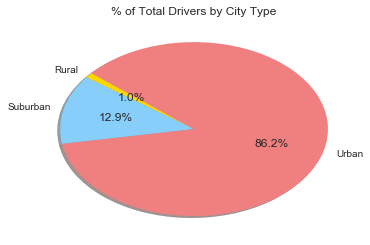

In [207]:
### Pie Chart - % Total Rides by City Type
total_drivers = city_ride_df["driver_count"].sum()
total_drivers_type = city_ride_df.groupby(["type"]).sum()
total_drivers_type["pct_total_drivers"] = (total_drivers_type["driver_count"]/total_drivers) * 100

#total_drivers_type

# create pie chart
colors = ["gold", "lightskyblue", "lightcoral"]
city_type = ["Rural", "Suburban", "Urban"]
plt.pie(total_drivers_type["pct_total_drivers"], labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

#print(total_fares_type)
plt.title("% of Total Drivers by City Type")
plt.show()